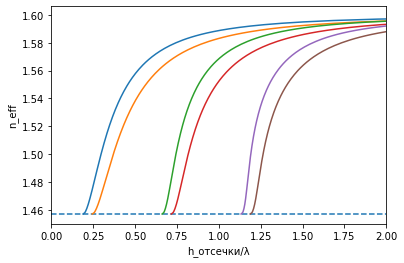

Диапазон толщин, при котором в волноводе распространяется только фундаментальная TE мода равен: [470,525] нм


In [100]:
import math
import numpy as np
import matplotlib.pyplot as plt

class SolGelWaveguide:
    '''
    Класс для создания объекта с характеристиками планарного волновода
    '''
    def __init__(self, n0:float, n1:float):
        '''
        Инициализация параметров волновода:
        n0 - показатель преломления волноводной пленки из золь-гель оксида алюминия
        n1 - показатель преломления подложки
        '''
        self.n0 = n0
        self.n1 = n1
        #рабочая длина волны излучения
        self.wl = 1550*10**(-9)
        #показатель преломления оболочки (берется для воздуха)
        self.n2 = 1
    
    def wave_factor(self):
        '''
        Выделенная функция для расчета волнового числа для заданной длины волны
        '''
        return 2*math.pi/self.wl
    
    def calculate_thickness(self, m:int, hi):
        '''
        Функция, которая расчитывает толщину отсечки для волновода с заданными параметрами
        m - номер моды 
        hi - параметр, равный 0 для TE моды и 1 для TM моды
        '''
        self.s1 = math.sqrt(self.n0**2 - self.n1**2)
        self.s2 = math.sqrt(self.n1**2 - self.n2**2)
        if hi == 0:
            #уравнение ниже есть дисперсионное соотношение для интегрально оптического планарного волновода
            self.thickness = 1/self.wave_factor()/self.s1*(math.pi*m + math.atan((self.n0/self.n1)**0)*self.s2/self.s1)
        elif hi == 1:
            self.thickness = 1/self.wave_factor()/self.s1*(math.pi*m + math.atan((self.n0/self.n1)**2)*self.s2/self.s1)
        return self.thickness
    
    def effective_mode_index(self, nm:float, m:int, hi):
        '''
        Фунция, которая рассчитывает толщину волновода, 
        которая соответствует некоторому эффективному показателю преломления
        nm - эффективный показатель преломления
        m - номер моды
        hi - параметр, равный 0 для TE моды и 1 для TM моды
        '''
        self.nm = nm
        self.k1 = math.sqrt(self.nm**2 - self.n1**2)
        self.k2 = math.sqrt(self.n0**2 - self.nm**2)
        self.k3 = math.sqrt(self.nm**2 - self.n2**2)
        
        if hi == 0:
            self.thickness = 1/self.wave_factor()/self.k3 * (math.pi*m + math.atan((self.n0/self.n1)**0)*self.k1/self.k2 + 
                                                      math.atan((self.n0/self.n2)**hi)*self.k3/self.k2)
        elif hi == 1:
            self.thickness = 1/self.wave_factor()/self.k3 * (math.pi*m + math.atan((self.n0/self.n1)**2)*self.k1/self.k2 + 
                                                      math.atan((self.n0/self.n2)**hi)*self.k3/self.k2)
        return self.thickness
                                                      
        
'''
Инициализация объекта-экземпляра с параметрами, которые соответствуют реальным 
показателям преломления, которые получены экспериментальным путем
'''
waveguide = SolGelWaveguide(1.6, 1.457)


'''
Построение b/V диаграммы для планарного волновода на основе золь-гель оксида алюминия
Для простоты выбраны фундаментальная и две моды высшего порядка для TE и TМ поляризации
'''
n_eff = np.arange(waveguide.n1, waveguide.n0, 0.001)
h_lambda_TE0 = [waveguide.effective_mode_index(item, 0, 0)/waveguide.wl for item in n_eff]
h_lambda_TM0 = [waveguide.effective_mode_index(item, 0, 1)/waveguide.wl for item in n_eff]

h_lambda_TE1 = [waveguide.effective_mode_index(item, 1, 0)/waveguide.wl for item in n_eff]
h_lambda_TM1 = [waveguide.effective_mode_index(item, 1, 1)/waveguide.wl for item in n_eff]

h_lambda_TE2 = [waveguide.effective_mode_index(item, 2, 0)/waveguide.wl for item in n_eff]
h_lambda_TM2 = [waveguide.effective_mode_index(item, 2, 1)/waveguide.wl for item in n_eff]


plt.plot(h_lambda_TE0, n_eff)
plt.plot(h_lambda_TM0, n_eff)
plt.plot(h_lambda_TE1, n_eff)
plt.plot(h_lambda_TM1, n_eff)
plt.plot(h_lambda_TE2, n_eff)
plt.plot(h_lambda_TM2, n_eff)
plt.xlim(0, 2)
plt.xlabel('h_отсечки/λ')
plt.ylabel('n_eff')
plt.hlines(waveguide.n1, 0, 2, linestyles='dashed')
plt.show()

'''
Для нормального функционирования ФИС необходимо существование только TE0 моды
'''

w1 = round(waveguide.calculate_thickness(0, 0)*10**9)
w2 = round(waveguide.calculate_thickness(0, 1)*10**9)

print(f'Диапазон толщин, при котором в волноводе распространяется только фундаментальная TE мода ' 
     f'равен: [{w1},{w2}] нм')